# LA County District Attorney Jacquelyn Lacey fundraising

### Load python tools

In [1]:
import json
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
from matplotlib import rc
%matplotlib inline
import numpy as np
import geojson
import jenkspy
import altair as alt
alt.renderers.enable('notebook')

import altair as alt
import altair_latimes as lat
alt.renderers.enable('notebook')
alt.themes.register('latimes', lat.theme)
alt.themes.enable('latimes')

pd.set_option('display.max_columns', None)

### Load full list of donations to county candidates since 2007

In [2]:
contributions = pd.read_csv('input/contributions.csv',low_memory=False, \
                            dtype={'contributor_zip_code': 'str', 'contributor_zip_code_ext': 'str'})
contributions.contributor_address_2 = contributions.contributor_address_2.fillna('')
contributions.occupation = contributions.occupation.fillna('')
contributions.employer = contributions.employer.fillna('')
contributions.description = contributions.description.fillna('')
contributions.contributor_first_name = contributions.contributor_first_name.fillna('')
contributions.contributor_zip_code_ext = contributions.contributor_zip_code_ext.fillna('')

### Clean up the table

In [3]:
#names
contributions['amount_rcvd'] = contributions['amount_rcvd'].astype(int)
contributions['monthyear'] = pd.to_datetime(contributions['date']).map(lambda dt: dt.replace(day=1))
contributions['type'] = contributions['type'].str.replace("Small Contributor Committee", "Small Donor Committee")
contributions['first_name'] = contributions['first_name'].str.upper()
contributions['last_name'] = contributions['last_name'].str.upper()
contributions['committee_name'] = contributions['committee_name'].str.upper()
contributions['candidate_name'] =  contributions["first_name"].str.title() + ' ' + contributions["last_name"].str.title()
contributions["nu_contributor_address"] = contributions["contributor_address"].str.split('#').str[0].str.split(', ').str[0].str.split('Ste').str[0].str.split('Suite').str[0].str.split(',').str[0]
contributions['full_address'] =  contributions["nu_contributor_address"] + ', ' + contributions["contributor_city"] + ', ' + contributions["contributor_state"] + ', ' + contributions["contributor_zip_code"].astype(str)
contributions['candidate_slug'] =  contributions["first_name"].str.lower() + '_' + contributions["last_name"].str.lower()
contributions['candidate_slug'] = contributions['candidate_slug'].str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '').str.replace('\'', '')

#time
contributions['date'] = pd.to_datetime(contributions['date'])
contributions['year'], contributions['month'] = contributions['date'].dt.year, contributions['date'].dt.month
contributions['year'] = contributions['year'].astype(str)
contributions['month'] = contributions['month'].astype(str)
contributions['months'] = contributions['date'].dt.strftime('%m/%Y').astype(str)
contributions['week'] = contributions['date'].dt.week
contributions['week'] = contributions['week'].astype(str)

### Filter data for recent contributions and money

In [4]:
recent_contributions = contributions[(contributions['date'] > '2018-06-30')]
lacey = recent_contributions[recent_contributions['candidate_name'].str.contains('Jacquelyn')]

### How much did Lacey raise? 

In [5]:
lacey['amount_rcvd'].sum()

465575

### Average donation amount?

In [6]:
lacey['amount_rcvd'].mean()

952.0961145194274

In [7]:
lacey.to_csv('output/lacey.csv')

### How many individual donations did she receive? 

In [8]:
#Remap donation 'type' codes to be more descriptive
# abbr_indiv_types = {'C' : 'Committee', 'I' : 'Individual', 'O' : 'Other', 'S' : 'Small Committee'}
abbr_indiv_else = {'C' : 'Other', 'I' : 'Individual', 'O' : 'Other', 'S' : 'Other'}
lacey = lacey.replace({"type": abbr_indiv_else})

In [109]:
lacey.head()

,last_name,first_name,committee_id,committee_name,office_type,district_number,schedule,type,period_beg_date,period_end_date,election_date,date,amount_rcvd,amount_pd,description,contributor_first_name,contributor_last_name,contributor_address,contributor_address_2,contributor_city,contributor_state,contributor_zip_code,contributor_zip_code_ext,occupation,employer,rec_id,cycle,monthyear,candidate_name,nu_contributor_address,full_address,candidate_slug,year,month,months,week
1431,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/18,12/31/18,NaN,2018-11-17,1000,0.0,,,Doug Haubert City Prosecutor 2018,525 E Seaside Way,# 101-C,Long Beach,CA,90802,8018,,,2558,2018-2019,2018-11-01,Jacquelyn Lacey,525 E Seaside Way,"525 E Seaside Way, Long Beach, CA, 90802",jacquelyn_lacey,2018,11,11/2018,46
1432,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/18,12/31/18,NaN,2018-12-20,1500,0.0,,,7-Eleven Franchisee's PAC,249 E Ocean Blvd,,Long Beach,CA,90802,4849,,,2558,2018-2019,2018-12-01,Jacquelyn Lacey,249 E Ocean Blvd,"249 E Ocean Blvd, Long Beach, CA, 90802",jacquelyn_lacey,2018,12,12/2018,51
1620,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/19,6/30/19,NaN,2019-02-18,1000,0.0,,,Lisa Green for Attorney 2014,1413 Corte Canalette,,Bakersfield,CA,93309,7129,,,2594,2019-2020,2019-02-01,Jacquelyn Lacey,1413 Corte Canalette,"1413 Corte Canalette, Bakersfield, CA, 93309",jacquelyn_lacey,2019,2,02/2019,8
1621,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/19,6/30/19,NaN,2019-02-27,500,0.0,,,Lee Andrews Group,818 W 7th St,Ste 880,Los Angeles,CA,90017,3566,,,2594,2019-2020,2019-02-01,Jacquelyn Lacey,818 W 7th St,"818 W 7th St, Los Angeles, CA, 90017",jacquelyn_lacey,2019,2,02/2019,9
1622,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/19,6/30/19,NaN,2019-03-29,1500,0.0,,,Hertzberg for Senate 2018,1787 Tribute Rd,Ste K,Sacramento,CA,95815,4404,,,2594,2019-2020,2019-03-01,Jacquelyn Lacey,1787 Tribute Rd,"1787 Tribute Rd, Sacramento, CA, 95815",jacquelyn_lacey,2019,3,03/2019,13


In [9]:
lacey_indiv = pd.pivot_table(lacey, values='amount_rcvd', \
                             index=(['candidate_name']), \
                             columns=['type'], aggfunc=[np.sum], fill_value='0').reset_index()

In [10]:
lacey_indiv

candidate_name        sum       
type                  Individual  Other
0     Jacquelyn Lacey     405975  59600

### Which share of each candidates donations came from individuals?

### Normalized bar chart for the share of individual donations

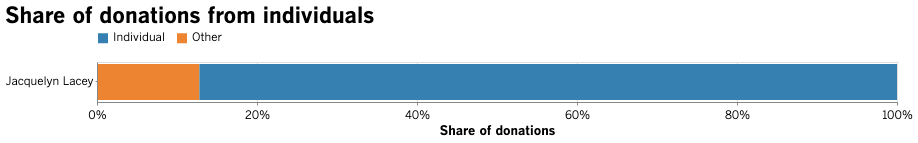

In [111]:
bars = alt.Chart(lacey, title='Share of donations from individuals').mark_bar().encode(
    x=alt.X('sum(amount_rcvd)', stack="normalize", title="Share of donations",axis=alt.Axis(format='%', tickCount=6)),
    y=alt.Y('candidate_name', title=""),
    color=alt.Color('type',legend=alt.Legend(title="", orient='top')),
    order=alt.Order('sum(amount_rcvd)', sort='ascending')
)

(bars).properties(height=40, width=800)

## Where exactly is each donation? 

In [112]:
#after geocoder.ipynb runs, import raw table with lat/lon for each grouped address in 'contributions'
geocoded = pd.read_csv('/Users/mhustiles/data/github/notebooks/campaign-finance/input/geocoded.csv')

In [113]:
geocoded.head(1)

,id,accuracy,formatted_address,google_place_id,input_string,latitude,longitude,number_of_results,postcode,response,status,type
0,0,ROOFTOP,"1250 Long Beach Ave # 104, Los Angeles, CA 900...",ChIJ11zqyoLIwoARZ2-vjBhFJzg,"1250 Long Beach Ave. 104, Los Angeles, CA, 90021",34.026282,-118.240472,1,90021,{'results': [{'address_components': [{'long_na...,OK,"establishment,point_of_interest"


### How good was Google's geocoding API? 

In [114]:
geocoded.accuracy.value_counts()

ROOFTOP               44116
RANGE_INTERPOLATED     1131
APPROXIMATE             342
GEOMETRIC_CENTER        323
Name: accuracy, dtype: int64

In [115]:
geocoded_clean = geocoded[['accuracy', 'formatted_address', 'input_string', 'latitude', 'longitude']]

### Merge geocoded data onto our 2nd District contributions table

In [116]:
geocoded_join = lacey.merge(geocoded_clean,left_on='full_address', right_on='input_string', how='left')

In [117]:
len(geocoded_join)

489

In [118]:
geocoded_join.groupby(["accuracy"])["amount_rcvd"].size()

accuracy
GEOMETRIC_CENTER        4
RANGE_INTERPOLATED      7
ROOFTOP               478
Name: amount_rcvd, dtype: int64

In [119]:
(((geocoded_join.amount_rcvd.sum() - geocoded_join[geocoded_join.accuracy != "ROOFTOP"].amount_rcvd.sum()) / geocoded_join.amount_rcvd.sum())*100).round(2)

98.23

### Let's eliminate donations where Google could find the address. 

In [120]:
geocoded_join = geocoded_join[geocoded_join.accuracy == "ROOFTOP"]

In [121]:
len(geocoded_join)

478

### Transform locations dataframe into Geo DataFrame (with appropriate coordinate system)

In [122]:
geocoded_join_gdf = gpd.GeoDataFrame(geocoded_join, geometry=gpd.points_from_xy(geocoded_join.longitude, geocoded_join.latitude))

In [123]:
geocoded_join_gdf.crs = {'init': "epsg:4326"}

In [124]:
geocoded_join_gdf.head()

,last_name,first_name,committee_id,committee_name,office_type,district_number,schedule,type,period_beg_date,period_end_date,election_date,date,amount_rcvd,amount_pd,description,contributor_first_name,contributor_last_name,contributor_address,contributor_address_2,contributor_city,contributor_state,contributor_zip_code,contributor_zip_code_ext,occupation,employer,rec_id,cycle,monthyear,candidate_name,nu_contributor_address,full_address,candidate_slug,year,month,months,week,accuracy,formatted_address,input_string,latitude,longitude,geometry
0,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/18,12/31/18,NaN,2018-11-17,1000,0.0,,,Doug Haubert City Prosecutor 2018,525 E Seaside Way,# 101-C,Long Beach,CA,90802,8018,,,2558,2018-2019,2018-11-01,Jacquelyn Lacey,525 E Seaside Way,"525 E Seaside Way, Long Beach, CA, 90802",jacquelyn_lacey,2018,11,11/2018,46,ROOFTOP,"525 E Seaside Way, Long Beach, CA 90802, USA","525 E Seaside Way, Long Beach, CA, 90802",33.765974,-118.185816,POINT (-118.1858155 33.7659735)
1,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/18,12/31/18,NaN,2018-12-20,1500,0.0,,,7-Eleven Franchisee's PAC,249 E Ocean Blvd,,Long Beach,CA,90802,4849,,,2558,2018-2019,2018-12-01,Jacquelyn Lacey,249 E Ocean Blvd,"249 E Ocean Blvd, Long Beach, CA, 90802",jacquelyn_lacey,2018,12,12/2018,51,ROOFTOP,"249 E Ocean Blvd, Long Beach, CA 90802, USA","249 E Ocean Blvd, Long Beach, CA, 90802",33.767313,-118.190096,POINT (-118.1900963 33.76731270000001)
2,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/19,6/30/19,NaN,2019-02-18,1000,0.0,,,Lisa Green for Attorney 2014,1413 Corte Canalette,,Bakersfield,CA,93309,7129,,,2594,2019-2020,2019-02-01,Jacquelyn Lacey,1413 Corte Canalette,"1413 Corte Canalette, Bakersfield, CA, 93309",jacquelyn_lacey,2019,2,02/2019,8,ROOFTOP,"1413 Corte Canalette, Bakersfield, CA 93309, USA","1413 Corte Canalette, Bakersfield, CA, 93309",35.342117,-119.090559,POINT (-119.0905587 35.34211690000001)
3,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/19,6/30/19,NaN,2019-02-27,500,0.0,,,Lee Andrews Group,818 W 7th St,Ste 880,Los Angeles,CA,90017,3566,,,2594,2019-2020,2019-02-01,Jacquelyn Lacey,818 W 7th St,"818 W 7th St, Los Angeles, CA, 90017",jacquelyn_lacey,2019,2,02/2019,9,ROOFTOP,"818 W 7th St, Los Angeles, CA 90017, USA","818 W 7th St, Los Angeles, CA, 90017",34.048897,-118.259585,POINT (-118.2595846 34.0488973)
4,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/19,6/30/19,NaN,2019-03-29,1500,0.0,,,Hertzberg for Senate 2018,1787 Tribute Rd,Ste K,Sacramento,CA,95815,4404,,,2594,2019-2020,2019-03-01,Jacquelyn Lacey,1787 Tribute Rd,"1787 Tribute Rd, Sacramento, CA, 95815",jacquelyn_lacey,2019,3,03/2019,13,ROOFTOP,"1787 Tribute Rd, Sacramento, CA 95815, USA","1787 Tribute Rd, Sacramento, CA, 95815",38.597527,-121.447490,POINT (-121.4474899 38.597527)


## Import and use LA County geography

### Read the Census blocks, with population/household figures added by county officials

In [125]:
#http://public.gis.lacounty.gov/public/rest/services/LACounty_Dynamic/Demographics/MapServer/3
blocks = gpd.read_file('/Users/mhustiles/data/data/GIS/LA/LA_county_census_blocks_2010/la_county_blocks_2010_data.geojson')

In [126]:
blocks.columns = blocks.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [127]:
blocks = blocks.to_crs({'init': "epsg:4326"})

In [128]:
len(blocks)

109279

In [129]:
blocks.columns

Index(['objectid', 'ct10', 'bg10', 'cb10', 'ctcb10', 'bg10fip10', 'cen_fip13',
       'la_fip10', 'city', 'comm', 'citycom', 'zcta10', 'puma10', 'hd_2012',
       'hd_name', 'spa_2012', 'spa_name', 'sup_dist', 'sup_label', 'housing10',
       'pop_2010', 'shape.starea', 'shape.stlength', 'ct12', 'bg12',
       'geometry'],
      dtype='object')

In [130]:
blocks['geoid10'] = blocks['ctcb10']

### Merge our contributions/locations data to Census blocks

In [131]:
dist_two_blocks = gpd.sjoin(geocoded_join_gdf, blocks, op='within', how="inner")

In [132]:
dist_two_blocks.columns = dist_two_blocks.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [133]:
lacey_blocks = dist_two_blocks[(dist_two_blocks['last_name'] == 'LACEY')]

In [134]:
lacey_blocks.head()

,last_name,first_name,committee_id,committee_name,office_type,district_number,schedule,type,period_beg_date,period_end_date,election_date,date,amount_rcvd,amount_pd,description,contributor_first_name,contributor_last_name,contributor_address,contributor_address_2,contributor_city,contributor_state,contributor_zip_code,contributor_zip_code_ext,occupation,employer,rec_id,cycle,monthyear,candidate_name,nu_contributor_address,full_address,candidate_slug,year,month,months,week,accuracy,formatted_address,input_string,latitude,longitude,geometry,index_right,objectid,ct10,bg10,cb10,ctcb10,bg10fip10,cen_fip13,la_fip10,city,comm,citycom,zcta10,puma10,hd_2012,hd_name,spa_2012,spa_name,sup_dist,sup_label,housing10,pop_2010,shape.starea,shape.stlength,ct12,bg12,geoid10
0,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/18,12/31/18,NaN,2018-11-17,1000,0.0,,,Doug Haubert City Prosecutor 2018,525 E Seaside Way,# 101-C,Long Beach,CA,90802,8018,,,2558,2018-2019,2018-11-01,Jacquelyn Lacey,525 E Seaside Way,"525 E Seaside Way, Long Beach, CA, 90802",jacquelyn_lacey,2018,11,11/2018,46,ROOFTOP,"525 E Seaside Way, Long Beach, CA 90802, USA","525 E Seaside Way, Long Beach, CA, 90802",33.765974,-118.185816,POINT (-118.1858155 33.7659735),81702,69160,576001,5760011,1000,5760011000,576001143000,43000,43000,Long Beach,Long Beach,City of Long Beach,90802,03766,40,Long Beach,8,South Bay,4,District 4,515,699,292278.966797,2486.120086,576001,5760011,5760011000
1,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/18,12/31/18,NaN,2018-12-20,1500,0.0,,,7-Eleven Franchisee's PAC,249 E Ocean Blvd,,Long Beach,CA,90802,4849,,,2558,2018-2019,2018-12-01,Jacquelyn Lacey,249 E Ocean Blvd,"249 E Ocean Blvd, Long Beach, CA, 90802",jacquelyn_lacey,2018,12,12/2018,51,ROOFTOP,"249 E Ocean Blvd, Long Beach, CA 90802, USA","249 E Ocean Blvd, Long Beach, CA, 90802",33.767313,-118.190096,POINT (-118.1900963 33.76731270000001),81712,69170,576001,5760012,2053,5760012053,576001243000,43000,43000,Long Beach,Long Beach,City of Long Beach,90802,03766,40,Long Beach,8,South Bay,4,District 4,0,0,68632.442383,1069.300144,576001,5760012,5760012053
3,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/19,6/30/19,NaN,2019-02-27,500,0.0,,,Lee Andrews Group,818 W 7th St,Ste 880,Los Angeles,CA,90017,3566,,,2594,2019-2020,2019-02-01,Jacquelyn Lacey,818 W 7th St,"818 W 7th St, Los Angeles, CA, 90017",jacquelyn_lacey,2019,2,02/2019,9,ROOFTOP,"818 W 7th St, Los Angeles, CA 90017, USA","818 W 7th St, Los Angeles, CA, 90017",34.048897,-118.259585,POINT (-118.2595846 34.0488973),70345,60022,207710,2077101,1016,2077101016,207710144000,44000,44000,Los Angeles,Downtown,Los Angeles - Downtown,90017,03744,9,Central,4,Metro,1,District 1,0,2,273625.196289,2148.832359,207710,2077101,2077101016
9,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/19,6/30/19,NaN,2019-06-27,1000,0.0,,,Lee Andrews Group,818 W 7th St,Ste 880,Los Angeles,CA,90017,3566,,,2594,2019-2020,2019-06-01,Jacquelyn Lacey,818 W 7th St,"818 W 7th St, Los Angeles, CA, 90017",jacquelyn_lacey,2019,6,06/2019,26,ROOFTOP,"818 W 7th St, Los Angeles, CA 90017, USA","818 W 7th St, Los Angeles, CA, 90017",34.048897,-118.259585,POINT (-118.2595846 34.0488973),70345,60022,207710,2077101,1016,2077101016,207710144000,44000,44000,Los Angeles,Downtown,Los Angeles - Downtown,90017,03744,9,Central,4,Metro,1,District 1,0,2,273625.196289,2148.832359,207710,2077101,2077101016
5,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/19,6/30/19,NaN,2019-03-29,1500,0.0,,,Women's Political Committee (State Account),777 S Figueroa St,,Los Angeles,CA,90017,5800,,,2594,2019-2020,2019-03-01,Jacquelyn Lacey,777 S Figueroa St,"777 S Figueroa St, Los Angeles, CA, 90017",jacquelyn_lacey,2019,3,03/2019,13,ROOFTOP,"777 Tower, 777 S Figueroa St, Los Angeles, CA ...","77

In [135]:
lacey_blocks.to_file\
    ("/Users/mhustiles/data/github/notebooks/campaign-finance/output/lacey_blocks.geojson", driver="GeoJSON")

## Donations by block

### How much did Lacey raise by block?

In [136]:
sum_by_block = pd.pivot_table(lacey_blocks, \
                              values='amount_rcvd', index=['geoid10'], \
                              columns=['candidate_slug'], aggfunc=np.sum, fill_value=0).reset_index()

In [137]:
sum_by_block.columns = sum_by_block.columns.to_series().str.join('')

In [138]:
sum_by_block.head(10)

candidate_slug,geoid10,jacquelyn_lacey
0,1013001015,1000
1,1021041006,100
2,1066031031,500
3,1082021000,100
4,1082021002,1500
5,1112051005,250
6,1112053000,1500
7,1131022008,250
8,1152023009,1000
9,1154011003,500


### How much was donated to Lacey from L.A. County blocks? 

In [139]:
sum_by_block.jacquelyn_lacey.sum()

402175

### How many blocks in LA County donated? 

In [140]:
sum_by_block.jacquelyn_lacey.count()

344

### Merge the blocks geography back onto our 2nd District winners table

In [141]:
lacey_blocks_geo = blocks.merge(sum_by_block, on='geoid10')

In [142]:
lacey_blocks_geo.to_file('output/lacey_blocks_geo.geojson', driver="GeoJSON")

In [143]:
lacey_blocks_geo.head(2)

,objectid,ct10,bg10,cb10,ctcb10,bg10fip10,cen_fip13,la_fip10,city,comm,citycom,zcta10,puma10,hd_2012,hd_name,spa_2012,spa_name,sup_dist,sup_label,housing10,pop_2010,shape.starea,shape.stlength,ct12,bg12,geometry,geoid10,jacquelyn_lacey
0,100060,269300,2693004,4001,2693004001,269300444000,44000,44000,Los Angeles,Cheviot Hills,Los Angeles - Cheviot Hills,90064,03729,84,West,5,West,2,District 2,30,88,258180.746094,2291.820396,269300,2693004,POLYGON ((-118.4192982160258 34.04184984506384...,2693004001,1450
1,100913,207710,2077101,1019,2077101019,207710144000,44000,44000,Los Angeles,Downtown,Los Angeles - Downtown,90017,03744,9,Central,4,Metro,1,District 1,322,425,147987.364258,1542.971173,207710,2077101,POLYGON ((-118.2563531892625 34.04944185507268...,2077101019,500


### Lacey table to MBTiles

In [144]:
!tippecanoe -z15 -f -o output/lacey_blocks_geo.mbtiles output/lacey_blocks_geo.geojson

For layer 0, using name "lacey_blocks_geo"
344 features, 113534 bytes of geometry, 2040 bytes of separate metadata, 37386 bytes of string pool
  99.9%  15/5631/13079  


## Donations by *Los Angeles Times* neighborhoods

In [145]:
neighborhoods = gpd.read_file('/Users/mhustiles/data/data/GIS/LA/la-county-city-neighborhoods.geojson')
neighborhoods.columns = neighborhoods.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

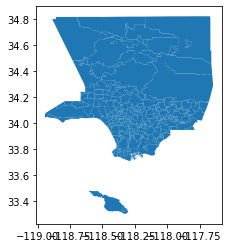

In [146]:
neighborhoods.plot()

In [147]:
lacey_hoods = gpd.sjoin(geocoded_join_gdf, neighborhoods, op='within', how="inner")

In [148]:
lacey_hoods.head(2)

,last_name,first_name,committee_id,committee_name,office_type,district_number,schedule,type_left,period_beg_date,period_end_date,election_date,date,amount_rcvd,amount_pd,description,contributor_first_name,contributor_last_name,contributor_address,contributor_address_2,contributor_city,contributor_state,contributor_zip_code,contributor_zip_code_ext,occupation,employer,rec_id,cycle,monthyear,candidate_name,nu_contributor_address,full_address,candidate_slug,year,month,months,week,accuracy,formatted_address,input_string,latitude,longitude,geometry,index_right,slug,set,kind,external_i,name,display_na,sqmi,type_right,name_1,slug_1
0,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/18,12/31/18,NaN,2018-11-17,1000,0.0,,,Doug Haubert City Prosecutor 2018,525 E Seaside Way,# 101-C,Long Beach,CA,90802,8018,,,2558,2018-2019,2018-11-01,Jacquelyn Lacey,525 E Seaside Way,"525 E Seaside Way, Long Beach, CA, 90802",jacquelyn_lacey,2018,11,11/2018,46,ROOFTOP,"525 E Seaside Way, Long Beach, CA 90802, USA","525 E Seaside Way, Long Beach, CA, 90802",33.765974,-118.185816,POINT (-118.1858155 33.7659735),135,long-beach,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),long-beach,Long Beach,Long Beach L.A. County Neighborhood (Current),52.1003673205,standalone-city,None,None
1,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/18,12/31/18,NaN,2018-12-20,1500,0.0,,,7-Eleven Franchisee's PAC,249 E Ocean Blvd,,Long Beach,CA,90802,4849,,,2558,2018-2019,2018-12-01,Jacquelyn Lacey,249 E Ocean Blvd,"249 E Ocean Blvd, Long Beach, CA, 90802",jacquelyn_lacey,2018,12,12/2018,51,ROOFTOP,"249 E Ocean Blvd, Long Beach, CA 90802, USA","249 E Ocean Blvd, Long Beach, CA, 90802",33.767313,-118.190096,POINT (-118.1900963 33.76731270000001),135,long-beach,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),long-beach,Long Beach,Long Beach L.A. County Neighborhood (Current),52.1003673205,standalone-city,None,None


In [149]:
lacey_hoods.columns = lacey_hoods.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

### How much did Lacey raise by neighborhood?

In [150]:
sum_by_hood = pd.pivot_table(lacey_hoods, values='amount_rcvd', \
                             index=['name'], columns=['candidate_slug'], aggfunc=np.sum, fill_value=0).reset_index()

In [151]:
sum_by_hood["total"] = sum_by_hood.sum(axis=1)

In [152]:
sum_by_hood.columns = sum_by_hood.columns.to_series().str.join('')

In [196]:
sum_by_hood.sort_values(by='total', ascending=False).head(10)

candidate_slug,name,jacquelyn_lacey,total
30,Downtown,28350,28350
12,Beverly Hills,24900,24900
113,Westwood,15950,15950
90,Sherman Oaks,15100,15100
36,Encino,14030,14030
62,Long Beach,13900,13900
86,Santa Monica,11650,11650
54,Koreatown,10000,10000
7,Bel-Air,9995,9995
19,Century City,9000,9000


### Merge the neighborhoods/winner geography back onto our 2nd District winners table

In [153]:
lacey_hoods = neighborhoods.merge(sum_by_hood, on='name', how='left')

### Remove the island

In [154]:
lacey_hoods = lacey_hoods[(lacey_hoods['name'] != 'Unincorporated Catalina Island') &\
                          (lacey_hoods['name'] != 'Avalon')]

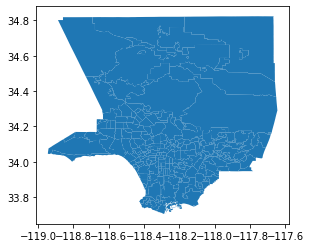

In [155]:
lacey_hoods.plot()

### Export spatial file with Lacey totals by neighborhood

In [156]:
lacey_hoods.to_file('output/lacey_hoods_sum.geojson', driver="GeoJSON")

In [194]:
lacey_hoods.fillna(0).head()

,slug,set,kind,external_i,name,display_na,sqmi,type,name_1,slug_1,geometry,jacquelyn_lacey,total,winner_group,id
0,acton,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),acton,Acton,Acton L.A. County Neighborhood (Current),39.3391089485,unincorporated-area,0,0,(POLYGON ((-118.2026174792054 34.5389897207692...,0.0,0.0,NaN,1
1,adams-normandie,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,Adams-Normandie L.A. County Neighborhood (Curr...,0.805350187789,segment-of-a-city,0,0,(POLYGON ((-118.3090080000001 34.0374109991240...,0.0,0.0,NaN,2
2,agoura-hills,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,Agoura Hills L.A. County Neighborhood (Current),8.14676029818,standalone-city,0,0,"(POLYGON ((-118.761925 34.16820299912263, -118...",200.0,200.0,1,3
3,agua-dulce,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),agua-dulce,Agua Dulce,Agua Dulce L.A. County Neighborhood (Current),31.4626319451,unincorporated-area,0,0,(POLYGON ((-118.2546773959221 34.5583040337505...,0.0,0.0,NaN,4
4,alhambra,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),alhambra,Alhambra,Alhambra L.A. County Neighborhood (Current),7.62381430605,standalone-city,0,0,(POLYGON ((-118.1217470000001 34.1050399991233...,1500.0,1500.0,2,5


### Generic neighborhoods to MBTiles

In [158]:
!tippecanoe -z15 -f -o output/la-county-city-neighborhoods.mbtiles /Users/mhustiles/data/data/GIS/LA/la-county-city-neighborhoods.geojson

For layer 0, using name "lacountycityneighborhoods"
272 features, 122892 bytes of geometry, 10159 bytes of separate metadata, 25186 bytes of string pool
  99.9%  15/5637/13016  


## Plot the donations

### Choropleth map with neighborhood totals

In [159]:
breaks = jenkspy.jenks_breaks(lacey_hoods.total, nb_class=7)
breaks

[100.0, 1100.0, 2500.0, 4600.0, 7350.0, 11650.0, 15950.0, 28350.0]

In [160]:
def get_group(value):
    for i, b in enumerate(breaks):
        if value <= breaks[i+0]:
            return i

In [161]:
lacey_hoods['winner_group'] = lacey_hoods.total.apply(get_group)

In [162]:
lacey_hoods['winner_group'] = lacey_hoods['winner_group'].fillna('NaN')

In [163]:
lacey_hoods.head()

,slug,set,kind,external_i,name,display_na,sqmi,type,name_1,slug_1,geometry,jacquelyn_lacey,total,winner_group
0,acton,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),acton,Acton,Acton L.A. County Neighborhood (Current),39.3391089485,unincorporated-area,None,None,(POLYGON ((-118.2026174792054 34.5389897207692...,NaN,NaN,NaN
1,adams-normandie,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),adams-normandie,Adams-Normandie,Adams-Normandie L.A. County Neighborhood (Curr...,0.805350187789,segment-of-a-city,None,None,(POLYGON ((-118.3090080000001 34.0374109991240...,NaN,NaN,NaN
2,agoura-hills,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),agoura-hills,Agoura Hills,Agoura Hills L.A. County Neighborhood (Current),8.14676029818,standalone-city,None,None,"(POLYGON ((-118.761925 34.16820299912263, -118...",200.0,200.0,1
3,agua-dulce,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),agua-dulce,Agua Dulce,Agua Dulce L.A. County Neighborhood (Current),31.4626319451,unincorporated-area,None,None,(POLYGON ((-118.2546773959221 34.5583040337505...,NaN,NaN,NaN
4,alhambra,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),alhambra,Alhambra,Alhambra L.A. County Neighborhood (Current),7.62381430605,standalone-city,None,None,(POLYGON ((-118.1217470000001 34.1050399991233...,1500.0,1500.0,2


In [164]:
lacey_hoods['id'] = lacey_hoods.index + 1
lacey_hoods['id'] = lacey_hoods['id'].astype(str)

### Winner group data to file

In [165]:
lacey_hoods.to_file("output/lacey_hoods_winner_groups.geojson", driver="GeoJSON")

In [166]:
!tippecanoe -zg -f -o output/lacey_hoods_winner_groups.mbtiles --generate-ids output/lacey_hoods_winner_groups.geojson

For layer 0, using name "lacey_hoods_winner_groups"
270 features, 152912 bytes of geometry, 15230 bytes of separate metadata, 26542 bytes of string pool
Choosing a maxzoom of -z5 for features about 14607 feet (4453 meters) apart
Choosing a maxzoom of -z8 for resolution of about 1009 feet (307 meters) within features
  99.9%  8/43/102  


In [167]:
lacey_hoods.loc[[0]]

,slug,set,kind,external_i,name,display_na,sqmi,type,name_1,slug_1,geometry,jacquelyn_lacey,total,winner_group,id
0,acton,L.A. County Neighborhoods (Current),L.A. County Neighborhood (Current),acton,Acton,Acton L.A. County Neighborhood (Current),39.3391089485,unincorporated-area,None,None,(POLYGON ((-118.2026174792054 34.5389897207692...,NaN,NaN,NaN,1


### Feed GeoJSON to Altair

In [168]:
geojson = json.loads(lacey_hoods.to_json())

In [169]:
features = alt.Data(values=geojson['features'])

In [170]:
choropleth = alt.Chart(features).mark_geoshape(stroke='white', strokeWidth=.4).encode(
    color='properties.winner_group:Q',
    tooltip=['properties.name:N', 'properties.total:N']
)

background = alt.Chart(features).mark_geoshape(
    fill='#e6e6e6',
    strokeWidth=.4,
    stroke='white'
)

### Where did Lacey raise her money?
#### Darker shades represent higher donation totals, by LA Times neighborhood

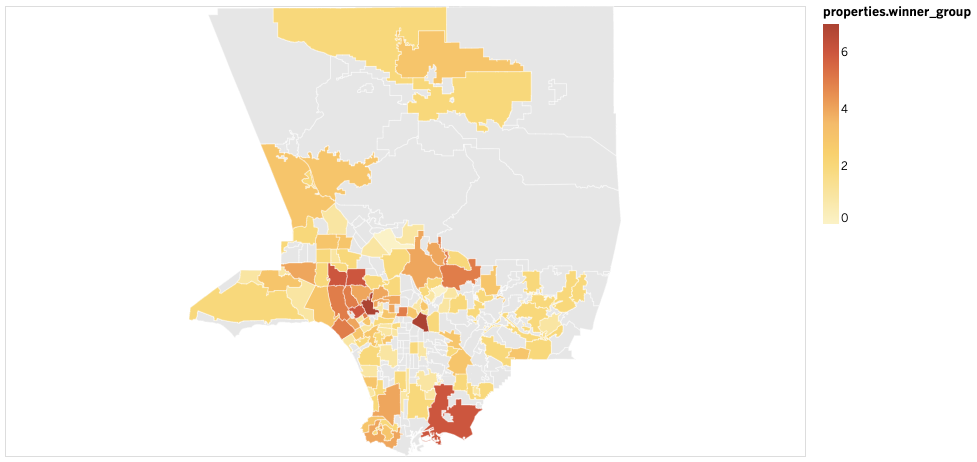

In [193]:
(background+choropleth)

### How much did Lacey raise — by month — in 2019? 

In [172]:
lacey_time = lacey.groupby(['monthyear','year','month', 'candidate_name'], \
                           as_index=False).agg({'amount_rcvd': ['size', 'mean', 'sum']}, as_index=False)

flat_columns = [''.join(t) for t in lacey_time.columns]
lacey_time.columns = flat_columns
lacey_time['amount_rcvdmean'] = lacey_time['amount_rcvdmean'].astype(int)
lacey_time['amount_rcvdmean'] = lacey_time['amount_rcvdmean'].round()
lacey_time.head(10)
lacey_time['months'] = lacey_time['monthyear'].dt.strftime('%b').astype(str)
lacey_time['week'] = lacey_time['monthyear'].dt.week

lacey_time

,monthyear,year,month,candidate_name,amount_rcvdsize,amount_rcvdmean,amount_rcvdsum,months,week
0,2018-11-01,2018,11,Jacquelyn Lacey,5,1100,5500,Nov,44
1,2018-12-01,2018,12,Jacquelyn Lacey,94,1276,120000,Dec,48
2,2019-01-01,2019,1,Jacquelyn Lacey,13,1269,16500,Jan,1
3,2019-02-01,2019,2,Jacquelyn Lacey,77,925,71300,Feb,5
4,2019-03-01,2019,3,Jacquelyn Lacey,85,950,80825,Mar,9
5,2019-04-01,2019,4,Jacquelyn Lacey,49,898,44050,Apr,14
6,2019-05-01,2019,5,Jacquelyn Lacey,28,825,23100,May,18
7,2019-06-01,2019,6,Jacquelyn Lacey,138,755,104300,Jun,22


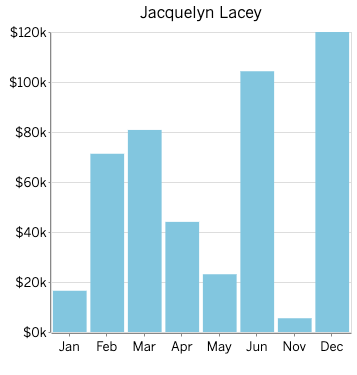

In [173]:
base = alt.Chart(lacey_time, title='').mark_bar().encode(
    x=alt.X("month:O", 
            timeUnit="yearmonth",
            title=" ",
            axis=alt.Axis(format="%b")
           ),
    y=alt.Y(
        'amount_rcvdsum:Q',
        title="",
        axis=alt.Axis(format="$1s", tickCount=5)
        )
    ).properties(height=300, width=300).facet(column = alt.Column('candidate_name:N', title=None), 
)
(base).configure_axisY(labelFontSize=13).configure_axisX(labelFontSize=13).configure_header(
    labelColor='black',
    labelFont='Benton Gothic',
    labelFontSize=16
)

### Read the zip codes by county GIS officials

In [174]:
#http://public.gis.lacounty.gov/public/rest/services/LACounty_Dynamic/Administrative_Boundaries/MapServer/5
zips = gpd.read_file('/Users/mhustiles/data/github/notebooks/campaign-finance/input/la_county_gis_zip_codes/la_county_gis_zip_codes_1569271283260.geojson')

In [175]:
zips.columns = zips.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [176]:
zips = zips.to_crs({'init': "epsg:4326"})

In [177]:
len(zips)

315

In [178]:
zips.columns

Index(['shape.area', 'shape.len', 'objectid', 'zipcode', 'geometry'], dtype='object')

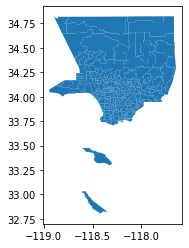

In [179]:
zips.plot()

In [180]:
lacey_zips = gpd.sjoin(geocoded_join_gdf, zips, op='within', how="inner")

In [181]:
lacey_zips.head(2)

,last_name,first_name,committee_id,committee_name,office_type,district_number,schedule,type,period_beg_date,period_end_date,election_date,date,amount_rcvd,amount_pd,description,contributor_first_name,contributor_last_name,contributor_address,contributor_address_2,contributor_city,contributor_state,contributor_zip_code,contributor_zip_code_ext,occupation,employer,rec_id,cycle,monthyear,candidate_name,nu_contributor_address,full_address,candidate_slug,year,month,months,week,accuracy,formatted_address,input_string,latitude,longitude,geometry,index_right,shape.area,shape.len,objectid,zipcode
0,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/18,12/31/18,NaN,2018-11-17,1000,0.0,,,Doug Haubert City Prosecutor 2018,525 E Seaside Way,# 101-C,Long Beach,CA,90802,8018,,,2558,2018-2019,2018-11-01,Jacquelyn Lacey,525 E Seaside Way,"525 E Seaside Way, Long Beach, CA, 90802",jacquelyn_lacey,2018,11,11/2018,46,ROOFTOP,"525 E Seaside Way, Long Beach, CA 90802, USA","525 E Seaside Way, Long Beach, CA, 90802",33.765974,-118.185816,POINT (-118.1858155 33.7659735),93,1.684347e+08,181881.275506,152,90802
1,LACEY,JACQUELYN,1412585,COMMITTEE TO RE-ELECT JACKIE LACEY FOR DISTRIC...,DAT,NaN,A,Other,1/1/18,12/31/18,NaN,2018-12-20,1500,0.0,,,7-Eleven Franchisee's PAC,249 E Ocean Blvd,,Long Beach,CA,90802,4849,,,2558,2018-2019,2018-12-01,Jacquelyn Lacey,249 E Ocean Blvd,"249 E Ocean Blvd, Long Beach, CA, 90802",jacquelyn_lacey,2018,12,12/2018,51,ROOFTOP,"249 E Ocean Blvd, Long Beach, CA 90802, USA","249 E Ocean Blvd, Long Beach, CA, 90802",33.767313,-118.190096,POINT (-118.1900963 33.76731270000001),93,1.684347e+08,181881.275506,152,90802


In [182]:
lacey_zips.columns = lacey_zips.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

### How much did Lacey raise by zip?

In [183]:
sum_by_zip = pd.pivot_table(lacey_zips, values='amount_rcvd', index=['zipcode'], columns=['candidate_slug'], aggfunc=np.sum, fill_value=0).reset_index()

In [184]:
sum_by_zip["total"] = sum_by_zip.sum(axis=1)

In [185]:
sum_by_zip.columns = sum_by_zip.columns.to_series().str.join('')

### How many zips in LA County donated? 

In [186]:
sum_by_zip.total.count()

135

### Which were Lacey's top zips? 

In [187]:
sum_by_zip.sort_values(by='total', ascending=False).head(10)

candidate_slug,zipcode,jacquelyn_lacey,total
43,90210,21050,21050
15,90024,15450,15450
3,90005,13500,13500
40,90071,13000,13000
41,90077,9995,9995
55,90274,9500,9500
114,91423,9500,9500
37,90067,9000,9000
115,91436,8280,8280
16,90025,8250,8250


In [188]:
sum_by_zip.to_csv('output/lacey_zips.csv')

### Merge the neighborhoods/winner geography back onto our 2nd District winners table

In [189]:
lacey_zips = zips.merge(sum_by_zip, on='zipcode')

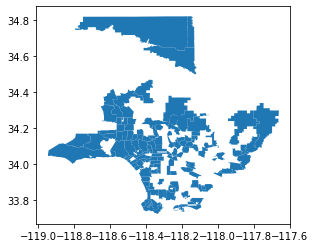

In [190]:
lacey_zips.plot()

### Export spatial file with totals by neighborhood

In [191]:
lacey_zips.to_file('output/lacey_zips_sum.geojson', driver="GeoJSON")

### Generate winners by zips to MBTiles

In [192]:
!tippecanoe -z15 -f -o output/lacey_zips_sum.mbtiles output/lacey_zips_sum.geojson

For layer 0, using name "lacey_zips_sum"
139 features, 741929 bytes of geometry, 2876 bytes of separate metadata, 7310 bytes of string pool
  99.9%  15/5605/13088  
